# GIS Python

### Import Python library

In [1]:
import shapely as shp
import os
import sys
import pandas as pd
import numpy as np 
import sklearn as sk
import gdal as gd
import geopandas as gpd
from fiona.crs import from_epsg

##### 1. Read all shapefiles in Python

In [2]:
# Using geopandas to read files
path=r"C:\Users\DELL\OneDrive - tuaf.edu.vn\TUAF\Python_Tutorial" # Define the data path

files=os.listdir(path)
# Save all shapefiles in a list

shape1=[]

for shape_file in files:
    if shape_file.endswith(".shp"):
        
        shape1.append(os.path.join(path,shape_file))
        
print("An example: ",shape1[2])
# Calculate the numbers of shapefile in shape1 list
sum1=0

for i in shape1:
    a=shape1.count(i)
    sum1+=a
print("Total number of shapefiles=",sum1)

for shape_file in shape1:
    myfile=gpd.read_file(shape_file) # Read all shapefiles available 
    print(myfile.crs.to_epsg())
    break


An example:  C:\Users\DELL\OneDrive - tuaf.edu.vn\TUAF\Python_Tutorial\DoDoc.shp
Total number of shapefiles= 21
None


##### 2. Check the projection, reproject and define new project of no projection and save it in to three geometry folders

###### 2a. Make new folders

In [3]:
# Create three folders including Polygon, Linestring, Points
## Polygon folder

Polygon=os.path.join(path,"Polygon")
if os.path.exists(Polygon):
    pass
else:
    os.mkdir(Polygon)

# Linestring folder

Linestring=os.path.join(path,"Linestring")
if os.path.exists(Linestring):
    pass
else:
    os.mkdir(Linestring)

# Points folder

Points=os.path.join(path,"Points")
if os.path.exists(Points):
    pass
else:
    os.mkdir(Points)

All_points=os.path.join(path,"All_points")

if os.path.exists(All_points):
    pass
else:
    os.mkdir(All_points)

In [4]:
# Test to connect folders with new names by replacing .shp by .csv
os.path.join(Points,shape1[2][0:-4]+".csv")


'C:\\Users\\DELL\\OneDrive - tuaf.edu.vn\\TUAF\\Python_Tutorial\\DoDoc.csv'

###### 2a. Check projection, reprojection and defining new projection 

In [5]:

for shape_file in shape1:
    myfile=gpd.read_file(shape_file) # Read all shapefiles available 
    try:
        if myfile.crs.to_epsg()==32648:
            if "POLYGON" in myfile.geometry.geom_type[0].upper(): # Check if the shape is a Polygon
                myfile["Area"]=round(myfile.geometry.area,2) # Calculate the area of each Polygon
                myfile["Centroid"]=myfile.geometry.centroid
                poly=myfile.drop(["geometry"],axis=1)
                poly=poly.rename(columns={"Centroid":"geometry"},inplace=False)
                poly.to_csv(os.path.join(Polygon,os.path.basename(shape_file[0:-4]) +".csv"))
                poly.to_file(os.path.join(All_points,os.path.basename(shape_file)))

            elif "LINESTRING" in myfile.geometry.geom_type[0].upper():
                myfile["Distance"]=round(myfile.geometry.length,2)
                myfile["Centroid"]=myfile.geometry.centroid
                lines=myfile.drop(["geometry"],axis=1)
                lines=lines.rename(columns={"Centroid":"geometry"},inplace=False)
                lines.to_csv(os.path.join(Linestring,os.path.basename(shape_file[0:-4])+".csv"))
                lines.to_file(os.path.join(All_points,os.path.basename(shape_file)))

            else:
                myfile["Long"]=myfile.geometry.x
                myfile["Lat"]=myfile.geometry.y
                myfile.to_csv(os.path.join(Points,os.path.basename(shape_file[0:-4]) +".csv"))
                myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))


        else: 
            myfile.to_crs(epsg=32648) # Wrong coordinate, reproject it
            if "POLYGON" in myfile.geometry.geom_type[0].upper():
                myfile["Area"]=round(myfile.geometry.area,2)
                myfile["Centroid"]=myfile.geometry.centroid
                poly=myfile.drop(["geometry"],axis=1)
                poly=poly.rename(columns={"Centroid":"geometry"},inplace=False)
                poly.to_csv(os.path.join(Polygon,os.path.basename(shape_file[0:-4])+".csv"))
                poly.to_file(os.path.join(All_points,os.path.basename(shape_file)))
                
            elif "LINESTRING" in myfile.geometry.geom_type[0].upper():
                myfile["Distance"]=myfile.geometry.length
                myfile["Centroid"]=myfile.geometry.centroid
                lines=myfile.drop(["geometry"],axis=1)
                lines=lines.rename(columns={"Centroid":"geometry"},inplace=False)
                lines.to_csv(os.path.join(Linestring,os.path.basename(shape_file[0:-4])+".csv"))
                poly.to_file(os.path.join(All_points,os.path.basename(shape_file)))
                
            else: # If Points 
                myfile["Long"]=myfile.geometry.x
                myfile["Lat"]=myfile.geometry.y
                myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))


    except AttributeError:
        myfile.set_crs(epsg=32648,allow_override=True)
        if "POLYGON" in myfile.geometry.geom_type[0].upper():
            myfile["Area"]=myfile.geometry.area
            myfile["Centroid"]=myfile.geometry.centroid
            poly=myfile.drop(["geometry"],axis=1)
            poly=poly.rename(columns={"Centroid":"geometry"},inplace=False)
            poly.to_csv(os.path.join(Polygon,os.path.basename(shape_file[0:-4])+".csv"))
            myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))

        elif "LINESTRING" in myfile.geometry.geom_type[0].upper():
            myfile["Distance"]=myfile.geometry.length
            myfile["Centroid"]=myfile.geometry.centroid
            lines=myfile.drop(["geometry"],axis=1)
            lines=lines.rename(columns={"Centroid":"geometry"},inplace=False)
            lines.to_csv(os.path.join(Linestring,os.path.basename(shape_file[0:-4])+".csv"))
            myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))

        else:
            myfile["Long"]=myfile.geometry.x
            myfile["Lat"]=myfile.geometry.y
            myfile.to_csv(os.path.join(Points,os.path.basename(shape_file[0:-4])+".csv"))
            myfile.to_file(os.path.join(All_points,os.path.basename(shape_file)))



### Testing rename method if drop geometry and rename it 

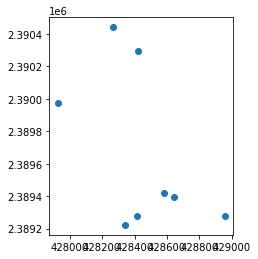

In [12]:
import geopandas as gpd
mydic=r"C:\Users\DELL\OneDrive - tuaf.edu.vn\TUAF\Python_Tutorial\Duongdien-QTQV.shp"
path1=r"C:\Users\DELL\OneDrive - tuaf.edu.vn\TUAF\Python_Tutorial\All_points"
myfile=gpd.read_file(mydic)

myfile.set_crs(epsg=32648,allow_override=True)

myfile["Centroid"]=myfile.geometry.centroid

a=myfile

b=a.set_geometry("Centroid",inplace=False) # We can set column Centroid to be spatial point

myfile=myfile.drop(["geometry"],axis=1)

myfile.head()

myfile=myfile.rename(columns={"Centroid":"geometry"},inplace=False)

myfile.head()

myfile.plot()

myfile.to_file(os.path.join(path1, os.path.basename(mydic)))

# Mosquito Mapping

In [2]:
# Set working directory 
path=r"F:\Research\Research_Cooperation\ILRI\GPS_Shapfile.csv"

In [3]:
import pandas as pd
import geopandas as gpd

In [4]:
myfile=pd.read_csv(path) # Read dataset

myfile.head() # Check first five rows

,ID,Lat,Long,District,Cx_T1,Cx_V1,Cx_Q1,Cx_T2,Cx_V2,Cx_Q2,Sum_CT1,Sum_CV1,Sum_CQ1,Sum_Cx
0,01 - 001,20.885556,105.651389,Chuong My,4,0,0.0,3,0,0,7,0,0,7
1,01 - 002,20.884722,105.635000,Chuong My,0,0,0.0,0,0,0,0,0,0,0
2,01 - 003,20.884722,105.649444,Chuong My,4,0,0.0,1,0,0,5,0,0,5
3,01 - 004,20.882222,105.658333,Chuong My,7,0,0.0,0,0,0,7,0,0,7
4,01 - 005,20.871111,105.671944,Chuong My,0,0,0.0,0,0,0,0,0,0,0


In [5]:
# Check some descritive statistics
print(myfile.shape)
print(myfile.dtypes)
myfile.describe()

(509, 14)
ID           object
Lat         float64
Long        float64
District     object
Cx_T1         int64
Cx_V1         int64
Cx_Q1       float64
Cx_T2         int64
Cx_V2         int64
Cx_Q2         int64
Sum_CT1       int64
Sum_CV1       int64
Sum_CQ1       int64
Sum_Cx        int64
dtype: object


,Lat,Long,Cx_T1,Cx_V1,Cx_Q1,Cx_T2,Cx_V2,Cx_Q2,Sum_CT1,Sum_CV1,Sum_CQ1,Sum_Cx
count,509.000000,509.000000,509.000000,509.000000,508.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,21.008237,105.735760,5.774067,0.831041,1.368110,11.161100,1.202358,0.834971,16.935167,2.033399,2.200393,21.168959
std,0.086626,0.055388,40.821317,2.664091,6.063465,71.952779,5.409993,3.055310,84.202662,6.546387,6.981917,87.666371
min,20.822500,105.629722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.934722,105.693889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,21.039444,105.736389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,21.082500,105.778333,2.000000,0.000000,1.000000,3.000000,0.000000,1.000000,7.000000,1.000000,2.000000,13.000000
max,21.140833,105.851667,858.000000,22.000000,108.000000,1300.000000,91.000000,43.000000,1303.000000,91.000000,108.000000,1309.000000


#### Building spatial points from the csv file

In [6]:
mypoint=gpd.GeoDataFrame(myfile, geometry=gpd.points_from_xy(myfile.Long,myfile.Lat), crs="EPSG:4326")

my_UTM=mypoint.to_crs(epsg=32648,inplace=False)

my_UTM.head()

,ID,Lat,Long,District,Cx_T1,Cx_V1,Cx_Q1,Cx_T2,Cx_V2,Cx_Q2,Sum_CT1,Sum_CV1,Sum_CQ1,Sum_Cx,geometry
0,01 - 001,20.885556,105.651389,Chuong My,4,0,0.0,3,0,0,7,0,0,7,POINT (567750.640 2309619.145)
1,01 - 002,20.884722,105.635000,Chuong My,0,0,0.0,0,0,0,0,0,0,0,POINT (566046.350 2309520.092)
2,01 - 003,20.884722,105.649444,Chuong My,4,0,0.0,1,0,0,5,0,0,5,POINT (567548.760 2309526.096)
3,01 - 004,20.882222,105.658333,Chuong My,7,0,0.0,0,0,0,7,0,0,7,POINT (568474.459 2309253.166)
4,01 - 005,20.871111,105.671944,Chuong My,0,0,0.0,0,0,0,0,0,0,0,POINT (569895.362 2308029.281)


<AxesSubplot:>

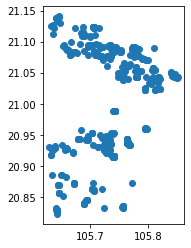

In [7]:
mypoint.plot()

In [8]:
for i in range(len(my_UTM)):
        for j in range(i,len(my_UTM)):
            if i!=j:
                mydist=my_UTM.iloc[i,:].geometry.distance(my_UTM.iloc[j,:].geometry)
                if mydist<50:
                    print(mydist)
            
            
    
        

30.744067192321022
28.8873195855368
42.1951399603366
42.19517559090395
30.743872680589707
28.90066980242318
30.743912832191715
28.898223502535036
42.193565707693594
42.19350453485776
28.905849847098064
42.19867672651215
0.0
30.744052370863894
42.196835225055516
42.197677193192696
42.196226759154364
30.744095465853558
30.744096452418873
30.74409744317519
42.19506777186858
42.18798095582394
28.899589621563322
42.19472488436997
42.194727093486485
30.744431332291757
30.744431332291757
42.19900717371968
28.905619448208864
30.743322818952517
30.744426892959755
0.0
42.19816521881769
42.17706155577958
42.184186518296784
28.884092654609514
42.184150754155475
30.744369812826243
28.884199229469935
30.744366834823154
42.18429380813548
42.18442847563659
30.74453197862995
42.1831456639111
42.18321722197567
0.0
28.88691335019475
28.88691335019475
28.88691335019475
28.88691335019475
0.0
42.178911610099846
42.178911610099846
30.744200083741482
42.18489755326121
28.887273202891624
42.18006844642483
28.8

In [77]:
myha.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [3]:
import xml.etree.ElementTree as ET
import geopandas
import subprocess
raster = r"F:\Research\Research_Cooperation\ILRI\Hanoi.tif"
shp_file = geopandas.read_file(r"F:\Research\Research_Cooperation\ILRI\GPS_Shapefile.shp")

data = {'Row': [],
        'Column': []}
for i in shp_file.geometry:
    output = subprocess.check_output("gdallocationinfo -xml -wgs84 {0} {1} {2}".format(raster,i.x,i.y), shell=True)
    tree = ET.fromstring (output)
    ketqua_dict = tree.attrib
    data['Row'].append(ketqua_dict['line'])
    data['Column'].append(ketqua_dict['pixel'])
shp_file['Row'] = data['Row']
shp_file['Column'] = data['Column']
shp_file.to_file(r"F:\Research\Research_Cooperation\ILRI\ketqua.shp")



CalledProcessError: Command 'gdallocationinfo -xml -wgs84 F:\Research\Research_Cooperation\ILRI\Hanoi.tif 105.6513889 20.88555556' returned non-zero exit status 1.